# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import nltk
import textwrap # Wraps the single paragraph in text, and returns a single string containing the wrapped paragraph

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Converting list of stop words into set.

In [3]:
stops = set(stopwords.words('english'))

# Adding new stopwords to set of stopwords

In [4]:
stops = stops.union({'would', 'could', 'said'})

# Mounting the Drive and Read the dataset

In [5]:
%cd /content/drive/MyDrive/Course Material/Topic Modeling

/content/drive/MyDrive/Course Material/Topic Modeling


In [6]:
df = pd.read_csv('bbc-text.csv')

In [7]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Instantiate the TFIDF Vectorizer

In [8]:
vectorizer = TfidfVectorizer(stop_words=list(stops))

# Extract features and fit TFIDF to the features

In [9]:
features = df['text']

In [10]:
R = vectorizer.fit_transform(features)

In [11]:
R.shape # This is doc by term matrix

(2225, 29277)

# Instantiate Non Matrix Factorizer and fit to X

In [12]:
nmf_model = NMF(
    n_components=5, # default: 10
    beta_loss="kullback-leibler", # using KL Loss based on the paper recommendation
    solver='mu',  # mu is multiplicative update, we need to define it when we use KL Loss
    random_state = 42,
)

In [13]:
nmf_model.fit(R)

NMF(beta_loss='kullback-leibler', n_components=5, random_state=42, solver='mu')

## The following code is copied from the scikit learn documention. This function plots the bar plot of each topic. It will show the top 10 words for each topic. This will give topics by word matrix

In [14]:
def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('NMF', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

# Apply the function

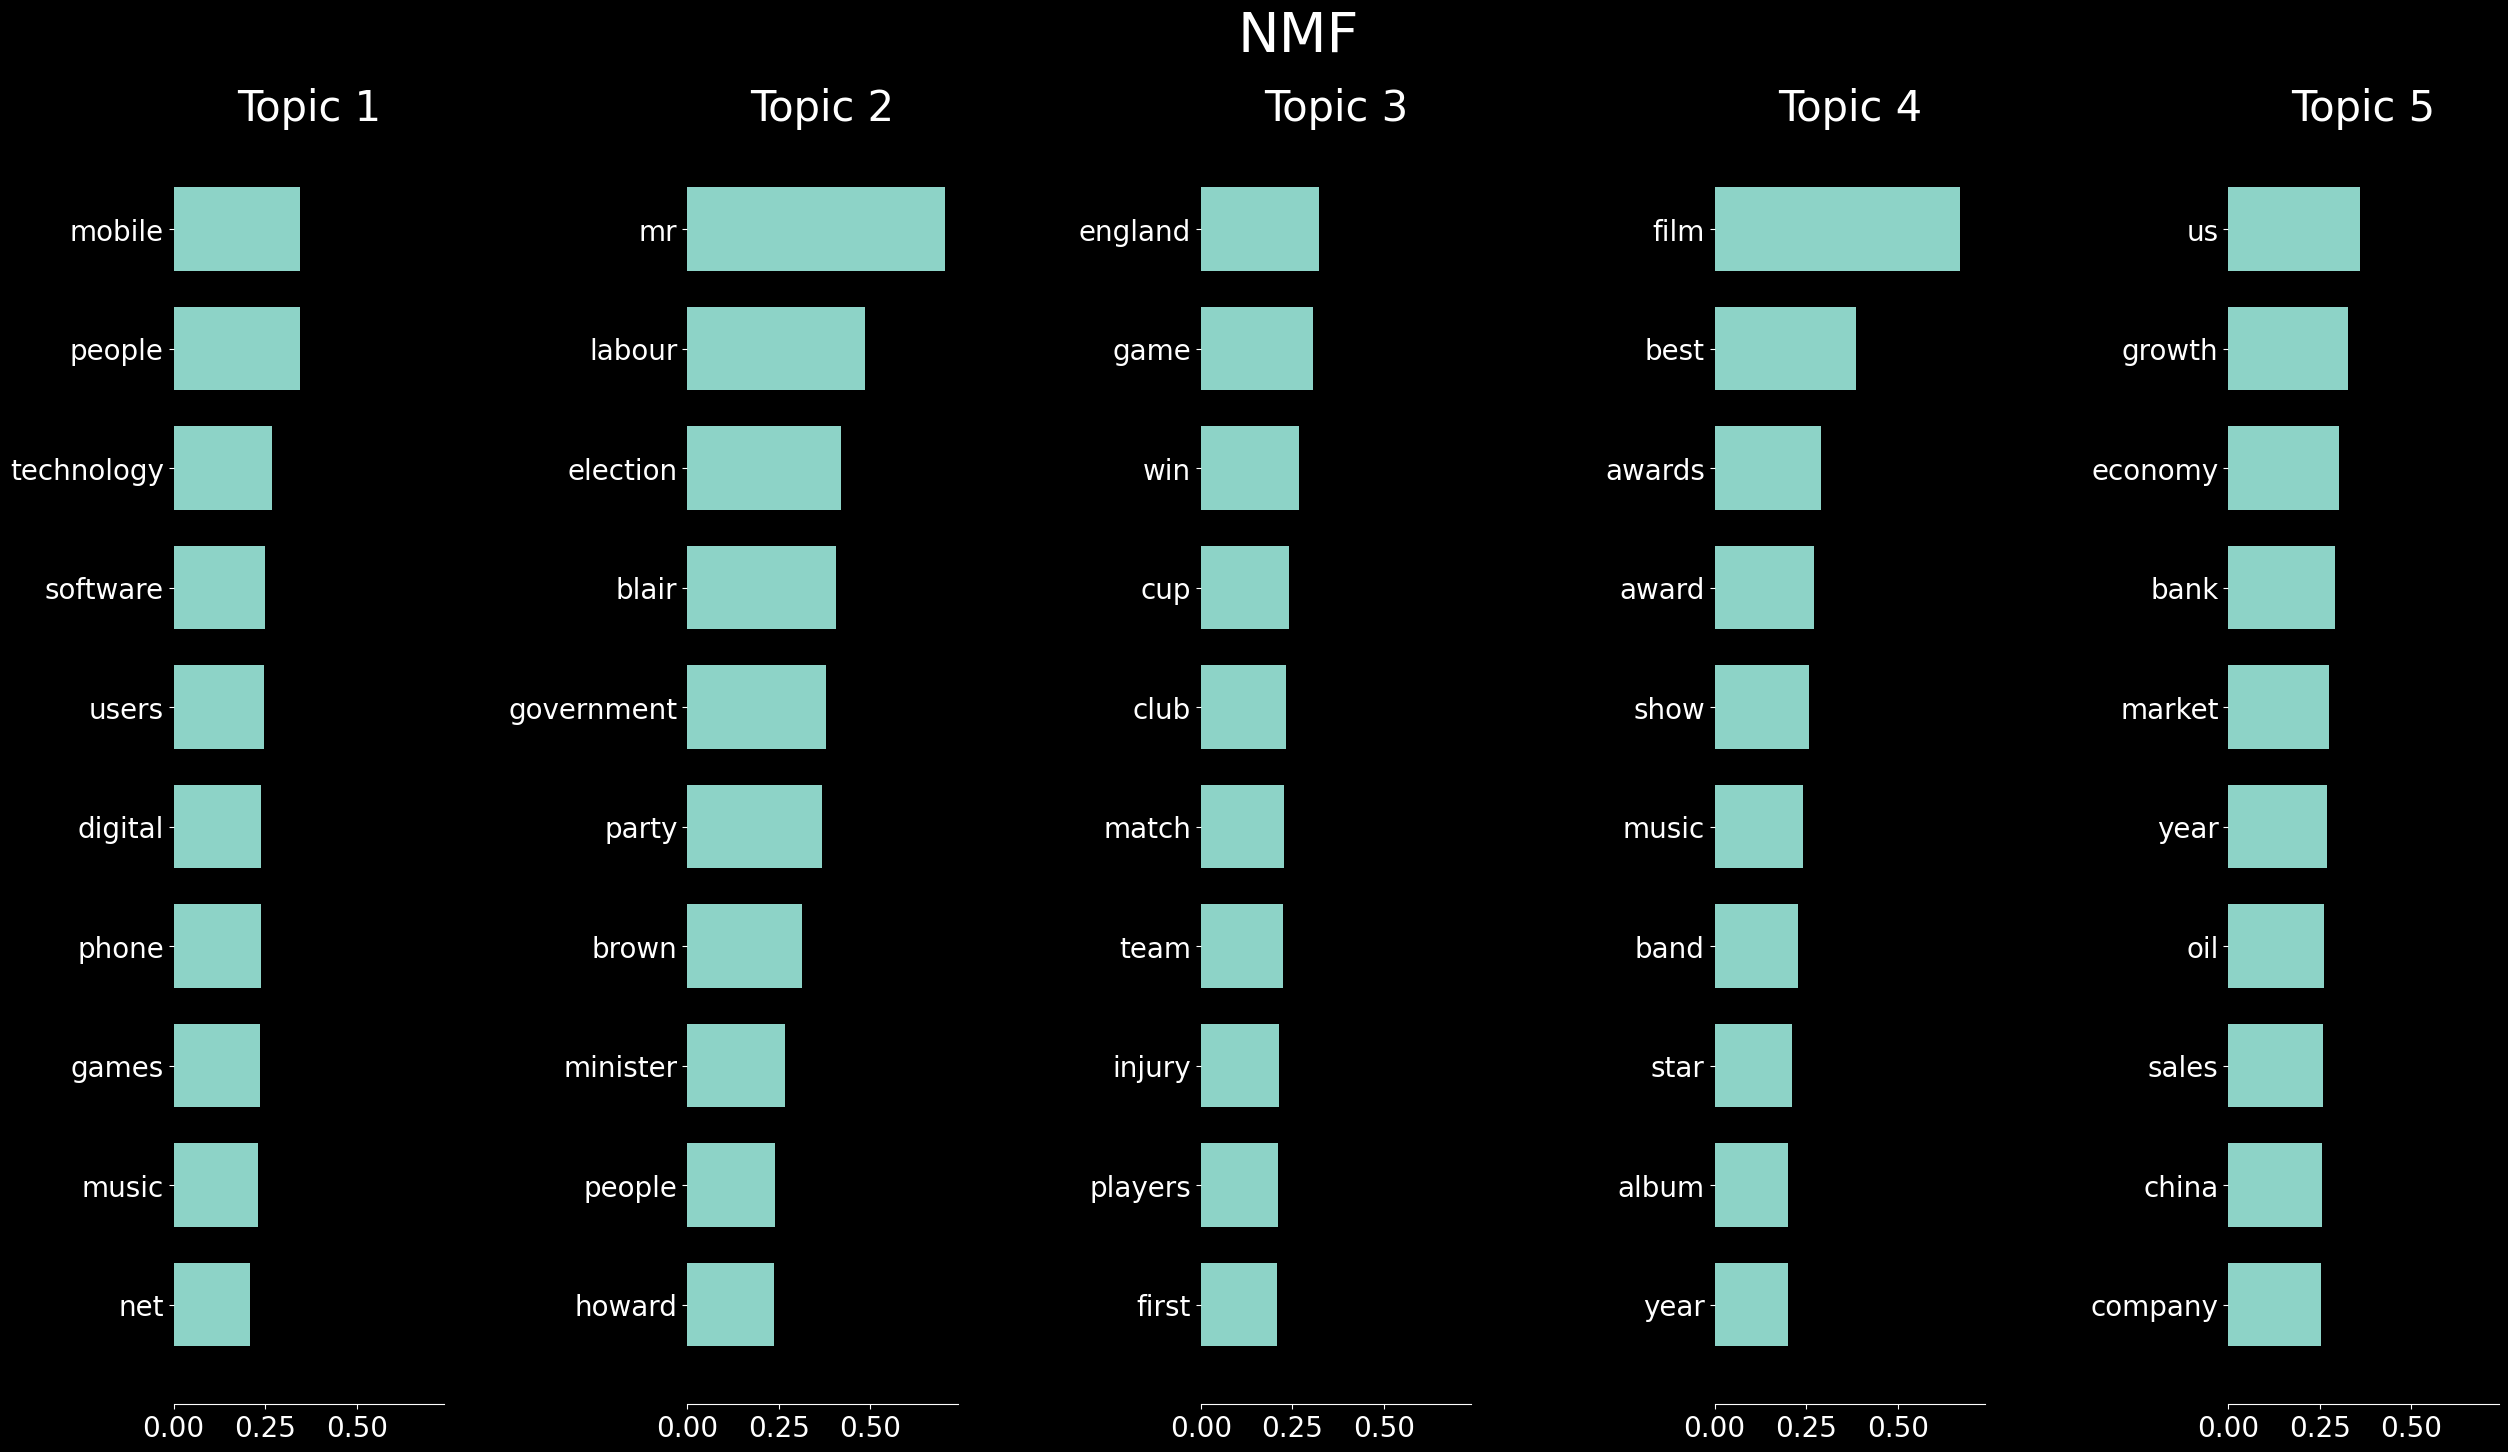

In [15]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(nmf_model, feature_names);

# Generate doc by topic matrix


In [16]:
Z = nmf_model.transform(R)  # doc by topic matrix

In [17]:
Z.shape

(2225, 5)

# Select a random document and see if the topic are associated with it.

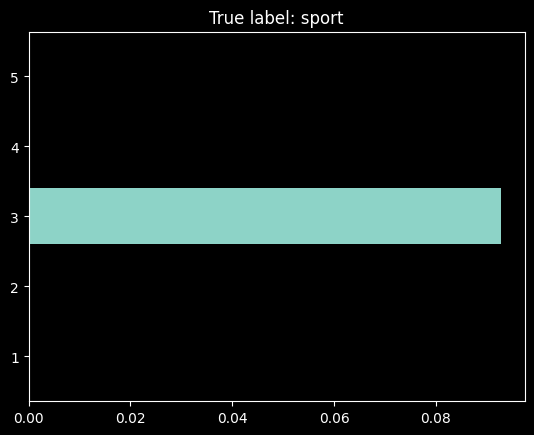

In [20]:
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(5) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['category']);

In [21]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

slovakia reach hopman cup final slovakia will play argentina in the
final of the hopman cup after beating group b rivals the netherlands
3-0.  daniela hantuchova defeated michaella krajicek 6-4 6-2 to give
the slovaks the perfect start before dutchman peter wessels retired
against dominik hrbaty.  wessels was unable to compete in the mixed
doubles but slovakia had already booked their place in the final for
the second year running.  argentina claimed top spot in group a with
three wins from three matches.  in the other group b match  the united
states defeated australia 2-1.  meghann shaughnessy lost the opening
match against alicia molik but james blake levelled the tie with a 6-3
6-4 win over paul baccanello  who came in as a replacement for the
injured mark philippoussis.  blake and shaughnessy then beat molik and
baccanello in a tense mixed doubles contest to take the win.
hantuchova  who did not win a hopman cup singles match in 2004  has
been in good form during this year s event